<a href="https://colab.research.google.com/github/PurveshBaghele/ML/blob/master/SelfDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
!git clone https://github.com/PurveshBaghele/Road_Data

fatal: destination path 'Road_Data' already exists and is not an empty directory.


In [92]:
!ls Road_Data


driving_log.csv  IMG


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import random
import os
import ntpath

In [94]:
datadir = 'Road_Data'
columns = ['center','left','right','steering','throttle','reverse','speed']
data = pd.read_csv(os.path.join(datadir,'driving_log.csv'),names = columns)
pd.set_option('display.max_colwidth',-1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,E:\data\IMG\center_2019_02_23_20_34_38_855.jpg,E:\data\IMG\left_2019_02_23_20_34_38_855.jpg,E:\data\IMG\right_2019_02_23_20_34_38_855.jpg,0.0,0.0,0.0,0.000078
1,E:\data\IMG\center_2019_02_23_20_34_38_962.jpg,E:\data\IMG\left_2019_02_23_20_34_38_962.jpg,E:\data\IMG\right_2019_02_23_20_34_38_962.jpg,0.0,0.0,0.0,0.000079
2,E:\data\IMG\center_2019_02_23_20_34_39_062.jpg,E:\data\IMG\left_2019_02_23_20_34_39_062.jpg,E:\data\IMG\right_2019_02_23_20_34_39_062.jpg,0.0,0.0,0.0,0.000078
3,E:\data\IMG\center_2019_02_23_20_34_39_163.jpg,E:\data\IMG\left_2019_02_23_20_34_39_163.jpg,E:\data\IMG\right_2019_02_23_20_34_39_163.jpg,0.0,0.0,0.0,0.000082
4,E:\data\IMG\center_2019_02_23_20_34_39_273.jpg,E:\data\IMG\left_2019_02_23_20_34_39_273.jpg,E:\data\IMG\right_2019_02_23_20_34_39_273.jpg,0.0,0.0,0.0,0.000078


In [0]:
def path_leaf(path):
  head,tail = ntpath.split(path)
  return tail

data['center']=data['center'].apply(path_leaf)
data['left']=data['left'].apply(path_leaf)
data['right']=data['right'].apply(path_leaf)

In [96]:
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_02_23_20_34_38_855.jpg,left_2019_02_23_20_34_38_855.jpg,right_2019_02_23_20_34_38_855.jpg,0.0,0.0,0.0,0.000078
1,center_2019_02_23_20_34_38_962.jpg,left_2019_02_23_20_34_38_962.jpg,right_2019_02_23_20_34_38_962.jpg,0.0,0.0,0.0,0.000079
2,center_2019_02_23_20_34_39_062.jpg,left_2019_02_23_20_34_39_062.jpg,right_2019_02_23_20_34_39_062.jpg,0.0,0.0,0.0,0.000078
3,center_2019_02_23_20_34_39_163.jpg,left_2019_02_23_20_34_39_163.jpg,right_2019_02_23_20_34_39_163.jpg,0.0,0.0,0.0,0.000082
4,center_2019_02_23_20_34_39_273.jpg,left_2019_02_23_20_34_39_273.jpg,right_2019_02_23_20_34_39_273.jpg,0.0,0.0,0.0,0.000078


[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]


<BarContainer object of 25 artists>

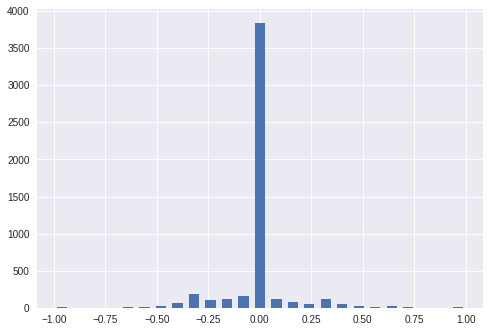

In [97]:
num_bins = 25
hist,bins = np.histogram(data['steering'],num_bins)
center = (bins[:-1]+bins[1:]) * 0.5
print(bins)
samples_per_bin = 200
plt.bar(center,hist,width=0.05)

<BarContainer object of 25 artists>

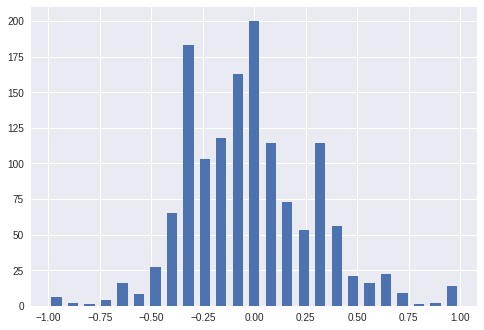

In [98]:
remove_list = []
for j in range(num_bins):
  list_=[]
  for i in range(len(data['steering'])):
    if data['steering'][i]>= bins[j] and data['steering'][i]<= bins[j+1]:
      list_.append(i)
   
  list_=shuffle(list_)
  list_=list_[samples_per_bin:]
  remove_list.extend(list_)

data.drop(data.index[remove_list],inplace=True)


histt,_=np.histogram(data['steering'],(num_bins))
plt.bar(center,histt,width=0.05)


In [0]:
def load_img_steering(datadir,df):
  image_path=[]
  steering=[]
  
  for i in range(len(data)):
    indexed_data=data.iloc[i]
    center,left,right=indexed_data[0],indexed_data[1],indexed_data[2]
    image_path.append(os.path.join(datadir,center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths=np.asarray(image_path)
  steerings=np.asarray(steering)
  
  return image_paths,steerings

image_path,steering = load_img_steering(datadir+'/IMG',data)
  

In [100]:
X_train,X_val,Y_train,Y_val=train_test_split(image_path,steering,test_size=0.2,random_state=69)
print('Training samples : {} \n Validation samples:{}'.format(len(X_train),len(X_val)))

Training samples : 1112 
 Validation samples:279


In [0]:
 def preprocessing(img):
    img = mpimg.imread(img) 
    img = img[60:135,:,:]
    img = cv2.cvtColor(img,cv2.COLOR_RGB2YUV) #y=luminousity, u & v = chromiance which adds color to the image
    img = cv2.GaussianBlur(img,(3,3),0)
    img = cv2.resize(img,(200,66))
    img=img/255
    return img

Text(0.5, 1.0, 'Preprocessed image')

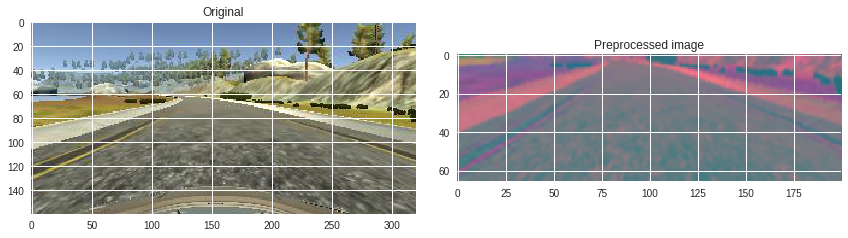

In [102]:
image = image_path[500]
original_image = mpimg.imread(image)
preprocessed_image = preprocessing(image)

fig,axs=plt.subplots(1,2,figsize=(12,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed image')

In [0]:
X_train=np.array(list(map(preprocessing,X_train)))
X_val=np.array(list(map(preprocessing,X_val)))

In [0]:
def nvidia_model():
  model=Sequential()
  model.add(Convolution2D(24,5,5,subsample=(2,2),input_shape=(66,200,3),activation='elu'))#subsample(i,j)=strides by row i and column j
  model.add(Convolution2D(36,5,5,subsample=(2,2),activation='elu'))
  model.add(Convolution2D(48,5,5,subsample=(2,2),activation='elu'))
  model.add(Convolution2D(64,3,3,activation='elu'))
  model.add(Convolution2D(64,3,3,activation='elu'))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(100,activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(50,activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(10,activation='elu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(1))
  
  model.compile(loss='mse',optimizer=Adam(0.001))
  return model
   

In [105]:
model=nvidia_model()
print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), act

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 18, 64)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)              0         
__________

In [106]:
history =model.fit(X_train,Y_train,epochs=30,validation_data=(X_val,Y_val),batch_size=100,verbose=1,shuffle=1)

Train on 1112 samples, validate on 279 samples
Epoch 1/30
1112/1112 [==============================] - 2s 2ms/step - loss: 1.3019 - val_loss: 0.5422
Epoch 2/30
1112/1112 [==============================] - 1s 776us/step - loss: 1.0321 - val_loss: 0.2183
Epoch 3/30
1112/1112 [==============================] - 1s 760us/step - loss: 0.7040 - val_loss: 0.0970
Epoch 4/30
1112/1112 [==============================] - 1s 716us/step - loss: 0.3082 - val_loss: 0.0815
Epoch 5/30
1112/1112 [==============================] - 1s 725us/step - loss: 0.1525 - val_loss: 0.0770
Epoch 6/30
1112/1112 [==============================] - 1s 707us/step - loss: 0.1276 - val_loss: 0.0770
Epoch 7/30
1112/1112 [==============================] - 1s 701us/step - loss: 0.1137 - val_loss: 0.0700
Epoch 8/30
1112/1112 [==============================] - 1s 703us/step - loss: 0.1011 - val_loss: 0.0652
Epoch 9/30
1112/1112 [==============================] - 1s 698us/step - loss: 0.1018 - val_loss: 0.0679
Epoch 10/30
1112/11

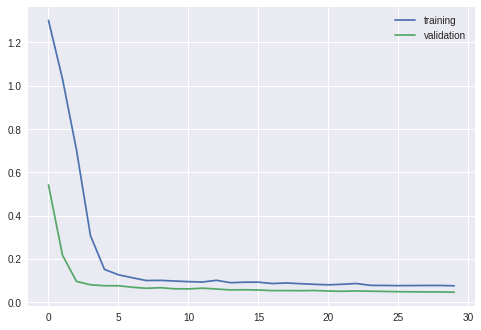

In [107]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])

In [0]:
model.save('model.h5')


In [0]:
from google.colab import files
files.download('model.h5')